In [81]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf


In [82]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()




[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440332,6.455078,6.391280,6.422878,493729600
2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800
2010-01-06,6.348846,6.477045,6.342225,6.451465,552160000
2010-01-07,6.337110,6.379843,6.291067,6.372319,477131200
2010-01-08,6.379239,6.379841,6.291366,6.328681,447610800


In [83]:
df.tail()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.757660,68.818186,67.878820,67.917557,98572000
2019-12-24,68.823013,68.973124,68.496178,68.924700,48478800
2019-12-26,70.188499,70.205449,68.927137,68.956189,93121200
2019-12-27,70.161880,71.171459,69.755147,70.481460,146266000
2019-12-30,70.578285,70.861551,69.053030,70.079551,144114400


In [84]:
df = df.reset_index()
df.head()


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440332,6.455078,6.391280,6.422878,493729600
1,2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800
2,2010-01-06,6.348846,6.477045,6.342225,6.451465,552160000
3,2010-01-07,6.337110,6.379843,6.291067,6.372319,477131200
4,2010-01-08,6.379239,6.379841,6.291366,6.328681,447610800


In [85]:
df = df.drop([ 'Date' ], axis=1)
df.head()


C:\Users\VEDANT\AppData\Local\Temp\ipykernel_21368\1697349530.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop([ 'Date' ], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440332,6.455078,6.391280,6.422878,493729600
1,6.451466,6.487879,6.417459,6.458086,601904800
2,6.348846,6.477045,6.342225,6.451465,552160000
3,6.337110,6.379843,6.291067,6.372319,477131200
4,6.379239,6.379841,6.291366,6.328681,447610800


In [86]:
print(df.columns)


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


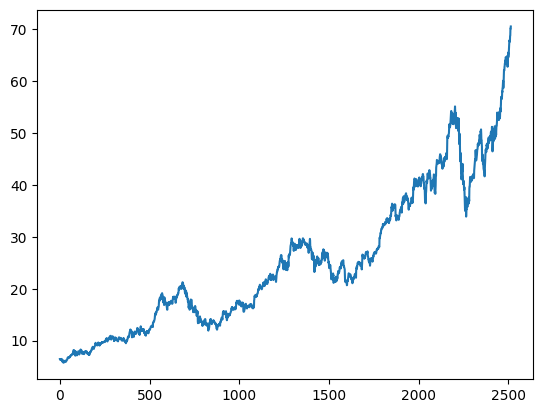

In [87]:
plt.plot(df.Close)


In [88]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440332,6.455078,6.391280,6.422878,493729600
1,6.451466,6.487879,6.417459,6.458086,601904800
2,6.348846,6.477045,6.342225,6.451465,552160000
3,6.337110,6.379843,6.291067,6.372319,477131200
4,6.379239,6.379841,6.291366,6.328681,447610800
...,...,...,...,...,...
2510,68.757660,68.818186,67.878820,67.917557,98572000
2511,68.823013,68.973124,68.496178,68.924700,48478800
2512,70.188499,70.205449,68.927137,68.956189,93121200


In [89]:
ma100 = df.Close.rolling(100).mean()
ma100


Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.212839
2511,57.410471
2512,57.647438
2513,57.875339


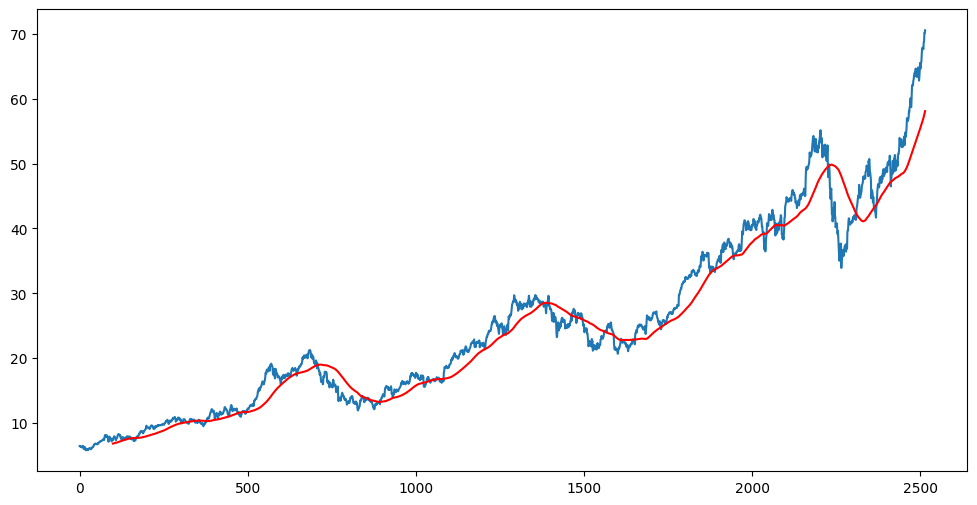

In [90]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [91]:
ma200 = df.Close.rolling(200).mean()
ma200


Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.164465
2511,52.291901
2512,52.425206
2513,52.555959


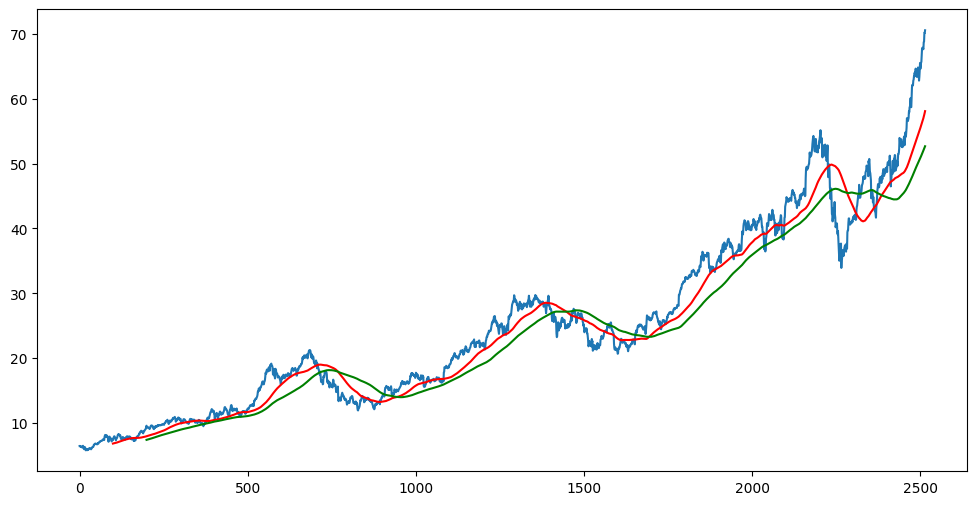

In [92]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [93]:
df.shape


(2515, 5)

In [94]:
#splitting data into training and testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [95]:
data_training.head()

Ticker,AAPL
0,6.440332
1,6.451466
2,6.348846
3,6.337110
4,6.379239


In [96]:
data_testing.head()

Ticker,AAPL
1760,26.996567
1761,26.786108
1762,26.862429
1763,26.832357
1764,26.968813


In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [98]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02760007],
       [0.02806504],
       [0.02377922],
       ...,
       [0.88408453],
       [0.89123223],
       [0.88640268]], shape=(1760, 1))

In [99]:
data_training_array.shape

(1760, 1)

In [100]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]) :
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train , y_train = np.array(x_train) , np.array(y_train)


In [101]:
#ML Model

In [102]:
from tensorflow.keras.layers import Dense, Dropout,  LSTM
from tensorflow.keras.models import Sequential


In [103]:
model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer
model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))


c:\Users\VEDANT\OneDrive\Desktop\Stock predictor\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [104]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 100, 120)       │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100, 120)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100, 1)         │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
model.compile(optimizer= 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - loss: 0.1726
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 0.0838
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0801
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.0766
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.0762
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.0760
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0759
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 0.0725
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.0755
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0736
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 0.0735
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0750
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0722
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0722
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - l

In [106]:
model.save('keras_model.h5')


In [107]:
data_testing.head()

Ticker,AAPL
1760,26.996567
1761,26.786108
1762,26.862429
1763,26.832357
1764,26.968813


In [108]:
past_100_days = data_training.tail(100)

In [109]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [110]:
final_df.head()


Ticker,AAPL
0,24.935093
1,25.036343
2,24.849966
3,24.833857
4,24.891375


In [111]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02573562],
       [0.02789681],
       [0.02391856],
       [0.0235747 ],
       [0.02480244],
       [0.03118742],
       [0.03069602],
       [0.0299103 ],
       [0.02922263],
       [0.03059786],
       [0.02642334],
       [0.02809305],
       [0.02406574],
       [0.02180642],
       [0.01871237],
       [0.01812301],
       [0.01409566],
       [0.0145867 ],
       [0.017681  ],
       [0.02259234],
       [0.02244496],
       [0.0256866 ],
       [0.01173823],
       [0.        ],
       [0.01134531],
       [0.0236727 ],
       [0.04243433],
       [0.06109753],
       [0.05790511],
       [0.05132389],
       [0.05127483],
       [0.05117651],
       [0.05643168],
       [0.04705096],
       [0.04788606],
       [0.0489174 ],
       [0.05314115],
       [0.04444799],
       [0.04872088],
       [0.04611786],
       [0.0484753 ],
       [0.04872088],
       [0.05284639],
       [0.05368141],
       [0.06345488],
       [0.06468286],
       [0.06979056],
       [0.068

In [112]:
input_data.shape

(855, 1)

In [113]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [114]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [115]:
#making predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step


In [116]:
y_predicted.shape

(755, 100, 1)

In [117]:
y_test

array([0.06973825, 0.06524596, 0.06687504, 0.06623316, 0.06914583,
       0.07556331, 0.08089489, 0.08148735, 0.08464682, 0.08217849,
       0.08114166, 0.08588087, 0.08583157, 0.08479473, 0.08588087,
       0.08627578, 0.08573276, 0.09516163, 0.0954579 , 0.09550716,
       0.09392743, 0.09254531, 0.129076  , 0.12798995, 0.13070508,
       0.13667834, 0.14279963, 0.14531739, 0.15002733, 0.14853993,
       0.15434077, 0.16291802, 0.16534752, 0.16455427, 0.16638879,
       0.17124762, 0.17328049, 0.17040474, 0.17104967, 0.17238794,
       0.17268547, 0.18656784, 0.18245284, 0.18651825, 0.1843367 ,
       0.18522896, 0.18265094, 0.18106437, 0.18334502, 0.18364263,
       0.18260152, 0.18988968, 0.19102988, 0.18755952, 0.19484784,
       0.18681562, 0.19464917, 0.19217041, 0.19078202, 0.19197189,
       0.20644944, 0.20803602, 0.20709385, 0.20575529, 0.20595332,
       0.2112586 , 0.20754022, 0.20575529, 0.20416871, 0.20332571,
       0.19569052, 0.1965336 , 0.19281497, 0.19668212, 0.19355

In [118]:
y_predicted

array([[[0.47046128],
        [0.48852792],
        [0.4879101 ],
        ...,
        [0.47835863],
        [0.4783581 ],
        [0.4783576 ]],

       [[0.4704848 ],
        [0.48854202],
        [0.48791835],
        ...,
        [0.4783581 ],
        [0.47835764],
        [0.47835723]],

       [[0.47044152],
        [0.48851633],
        [0.48790428],
        ...,
        [0.4783576 ],
        [0.47835723],
        [0.4783569 ]],

       ...,

       [[0.47641397],
        [0.49201778],
        [0.4899052 ],
        ...,
        [0.48488647],
        [0.48491588],
        [0.48494568]],

       [[0.47660714],
        [0.49213183],
        [0.4899747 ],
        ...,
        [0.48491588],
        [0.48494568],
        [0.4849772 ]],

       [[0.4767045 ],
        [0.49218965],
        [0.4900055 ],
        ...,
        [0.48494568],
        [0.4849772 ],
        [0.4850108 ]]], shape=(755, 100, 1), dtype=float32)

In [119]:
scaler.scale_

array([0.02134523])

In [120]:
scale_factor = 1/0.02134523
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

y_predicted_fixed shape: (755,)


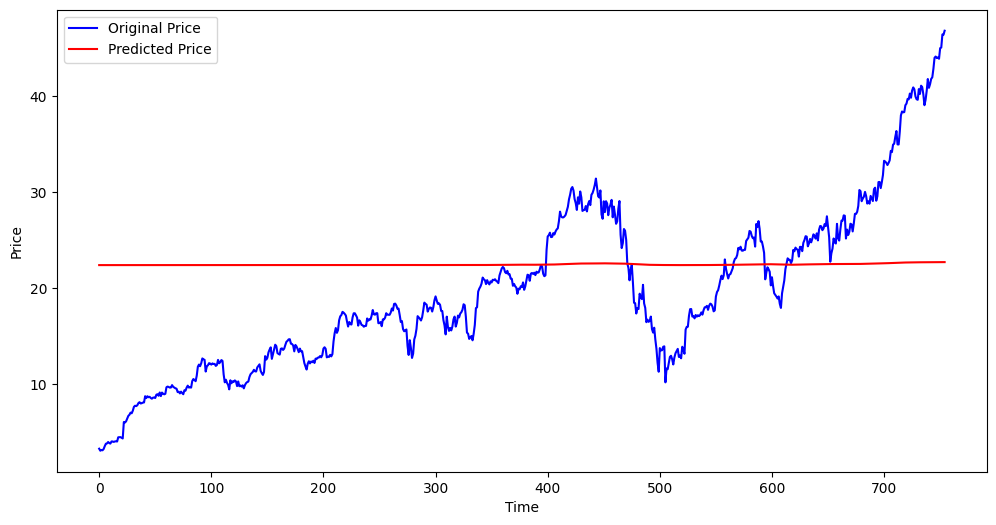

In [125]:
y_predicted_fixed = y_predicted[:, -1, 0]  # Extract last predicted value per time step

print("y_predicted_fixed shape:", y_predicted_fixed.shape)  # Should be (755,)




# Plotting
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')  # y_test is (755,)
plt.plot(y_predicted_fixed, 'r', label='Predicted Price')  # y_predicted_fixed is now (755,)
plt.xlabel('Time')  
plt.ylabel('Price')
plt.legend()
plt.show()

